In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [26]:
# task 1
# calc greeks for call option

def calc_derivative(func, x, dx=1e-2):
    return (func(x + dx) - func(x - dx)) / 2 / dx

def calc_second_derivative(func, x, dx=1e-2):
    return (func(x + dx) - 2 * func(x) + func(x - dx)) / dx / dx

def call(S, K, tau, vol, r, q):
    d1 = (np.log (S / K) + (r + vol**2 / 2) * tau) / (vol * np.sqrt(tau))
    d2 = d1 - vol * np.sqrt(tau)
    return S * np.exp(-q * tau) * norm.cdf(d1) - K * np.exp (-r * tau) * norm.cdf(d2)

#params

S = 100
K = 100
tau = 1
r = 0.07
q = 0
vol = 0.3
print(f'Call = ', call(S, K, tau, vol, r, q))

# delta
dC_dS = calc_derivative(func=lambda x: call(x, K, tau, vol, r, q), x=S)
print('Delta = ', dC_dS)

# gamma
d2C_dS2 = calc_derivative(func=lambda X: calc_derivative(func=lambda x: call(x, K, tau, vol, r, q), x=X), x=S)
print('\nGamma = ', d2C_dS2)

d2C_dS2 = calc_second_derivative(func=lambda x: call(x, K, tau, vol, r, q), x=S)
print('Gamma (other numeric scheme) = ', d2C_dS2, '\n')

# rho
dC_dr = calc_derivative(func=lambda x: call(S, K, tau, vol, x, q), x=r)
print('Rho = ', dC_dr)

# vega
dC_dvol = calc_derivative(func=lambda x: call(S, K, tau, x, r, q), x=vol)
print('Vega = ', dC_dvol)

# theta
dC_dtau = calc_derivative(func=lambda x: call(S, K, x, vol, r, q), x=tau)
print('Theta = ', dC_dtau)

Call =  15.210500635727158
Delta =  0.6492636818265396

Gamma =  0.012356066179108893
Gamma (other numeric scheme) =  0.01235606632121744 

Rho =  49.71200638018374
Vega =  37.066929117762015
Theta =  9.040416541721186


In [16]:
# task 2: calc fair put price and put greeks

def put(S, K, tau, vol, r, q):
    return call(S, K, tau, vol, r, q) + K * np.exp(-r * tau) - S

print(f'Put = ', put(S, K, tau, vol, r, q))

# delta
dC_dS = calc_derivative(func=lambda x: put(x, K, tau, vol, r, q), x=S)
print('Delta = ', dC_dS)

# gamma
d2C_dS2 = calc_derivative(func=lambda X: calc_derivative(func=lambda x: put(x, K, tau, vol, r, q), x=X), x=S)
print('Gamma = ', d2C_dS2)

# rho
dC_dr = calc_derivative(func=lambda x: put(S, K, tau, vol, x, q), x=r)
print('Rho = ', dC_dr)

# vega
dC_dvol = calc_derivative(func=lambda x: put(S, K, tau, x, r, q), x=vol)
print('Vega = ', dC_dvol)

# theta
dC_dtau = calc_derivative(func=lambda x: put(S, K, x, vol, r, q), x=tau)
print('Theta = ', dC_dtau)

Put =  8.44988262632198
Delta =  -0.350736318173972
Gamma =  0.012356066179108893
Rho =  -43.528929607880684
Vega =  37.066929117762015
Theta =  2.5136592693598914


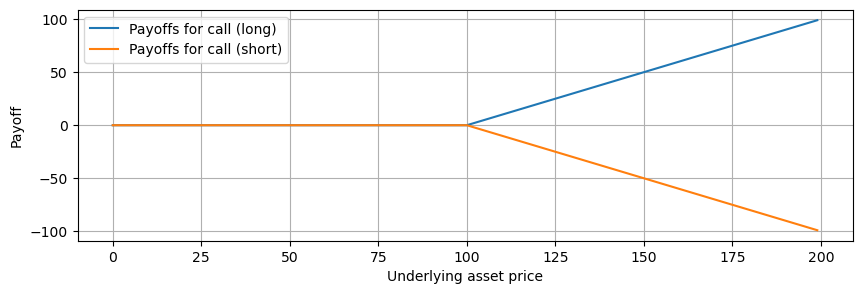

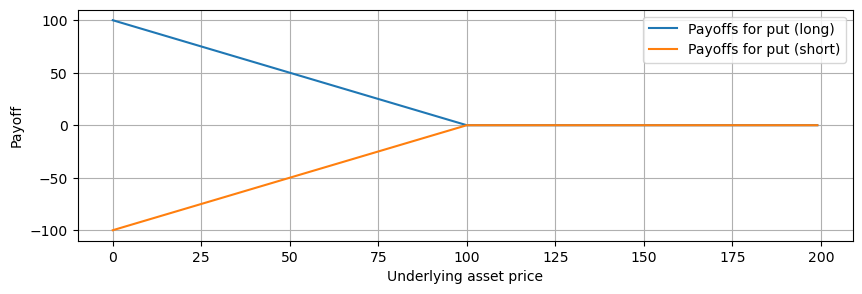

In [24]:
# task 3 plot payoffs for call and put
Ss = np.arange(0, 2 * S)
payoffs = np.maximum(0, Ss - K)

plt.figure(figsize=(10, 3))
plt.plot(Ss, payoffs, label='Payoffs for call (long)')
plt.plot(Ss, -payoffs, label='Payoffs for call (short)')
plt.legend()
plt.xlabel('Underlying asset price')
plt.ylabel('Payoff')
plt.grid()

payoffs = np.maximum(0, -Ss + K)

plt.figure(figsize=(10, 3))
plt.plot(Ss, payoffs, label='Payoffs for put (long)')
plt.plot(Ss, -payoffs, label='Payoffs for put (short)')
plt.xlabel('Underlying asset price')
plt.ylabel('Payoff')
plt.legend()
plt.grid()
